In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

import warnings
warnings.filterwarnings('ignore')

# Sets a random seed to ensure reproducible results

In [3]:
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
"""
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)"
"""

'\nfrom keras import backend as K\nsession_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)\nsess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)\ntf.compat.v1.keras.backend.set_session(sess)"\n'

In [4]:
X_train = pd.read_csv("../Data/X_train.csv")
y_train = pd.read_csv("../Data/y_train.csv")
X_test = pd.read_csv("../Data/X_test.csv")
y_test = pd.read_csv("../Data/y_test.csv")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(572, 39)
(106, 39)
(572, 1)
(106, 1)


,Age (yrs),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Blood Group_A+,Blood Group_A-,Blood Group_B+,Blood Group_O+,Menstrual Cycle(R/I)_irregular,Menstrual Cycle(R/I)_regular
0,1.212838,1.138042,1.784158,0.512320,2.088819,-1.974369,1.714235,1,1.032154,-0.155302,...,1.206324,0.540522,-1.930875,1.224986,1.0,0.0,0.0,0.0,1.0,0.0
1,1.212838,-0.738207,-0.519094,-0.729579,1.608630,0.007810,1.303924,0,-0.413545,-0.194309,...,-1.252294,0.540522,-0.733442,-0.937186,0.0,0.0,1.0,0.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.512320,1.008395,0.668536,1.098769,1,-0.413545,0.542465,...,-0.358251,-1.333144,-1.332158,-1.612865,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.512320,-0.072028,0.007810,-1.157939,1,-0.413545,2.727182,...,-0.358251,1.343521,1.362066,-1.342594,0.0,0.0,1.0,0.0,0.0,1.0
4,1.031939,1.138042,2.551909,1.754218,0.048019,0.007810,1.303924,0,-0.413545,-0.194309,...,-0.805273,1.611188,0.763349,0.324081,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-1.500652,0.391513,0.471164,-0.729579,-0.295301,0.007810,-1.069735,1,-0.413545,-0.194309,...,1.655484,-0.262478,-0.263431,0.954284,1.0,0.0,0.0,0.0,0.0,1.0
568,-1.663973,0.035117,0.211353,0.391636,1.690291,-1.845955,-0.932848,0,-0.413545,-0.194309,...,1.494994,0.057211,0.135542,0.665662,0.0,0.0,0.0,0.0,1.0,0.0
569,-0.777055,-0.014873,2.375315,1.276096,-0.293518,0.007810,-0.794817,0,-0.413545,-0.194307,...,0.122313,0.602089,1.016314,-0.443158,0.0,0.0,0.0,0.0,1.0,0.0
570,1.393738,0.017166,1.784158,0.512320,-0.552216,-0.633201,1.098769,0,-0.413545,-0.190567,...,0.982813,0.545846,-0.419196,2.860747,0.0,0.0,0.0,1.0,1.0,0.0


## Logistic Regression

In [5]:
# define model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [6]:
# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
cv_roc_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

In [7]:
print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores}")
print(f"Mean Accuracy: {cv_accuracy_scores.mean():.4f}")

print(f"Cross-Validation AUC-ROC Scores: {cv_roc_auc_scores}")
print(f"Mean AUC-ROC: {cv_roc_auc_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.84347826 0.93913043 0.88596491 0.94736842 0.88596491]
Mean Accuracy: 0.9004
Cross-Validation AUC-ROC Scores: [0.94338462 0.97900183 0.93703704 0.97592593 0.96666667]
Mean AUC-ROC: 0.9604


In [8]:
model.fit(X_train,y_train)

print("The intercept b0= ", model.intercept_)
print("The coefficient b1= ", model.coef_)

# predict test set
y_pred= model.predict(X_test)

The intercept b0=  [-2.99401992]
The coefficient b1=  [[-0.17713254  0.3194028   0.2584275  -0.20245996 -0.10059534 -0.11193077
  -0.47661351 -0.33319356 -0.20516652 -0.42647614  0.62481223 -0.13572757
  -0.05925975  0.20436513  0.35457001  0.01950687 -0.30684418 -0.31464333
   0.32374593  1.10470663  1.18130534  1.67043412  0.59949324  1.08524398
   0.92279011  0.24199909 -0.1475653  -0.10573266  0.14699309  1.91464775
   0.21754204  0.0285703   0.05757584 -0.51816212 -0.77209491 -0.31511106
  -0.50381974  0.56357001 -0.57092223]]


[[61 11]
 [ 5 29]]


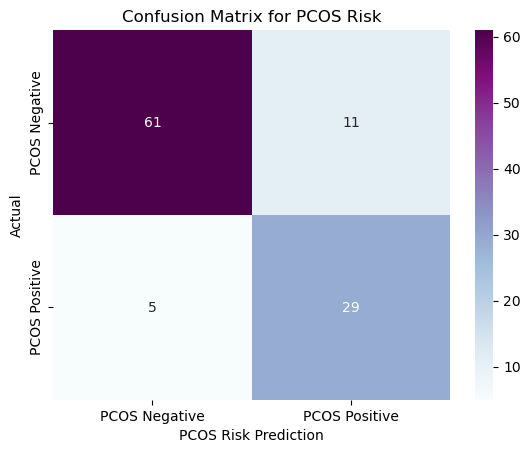

In [9]:
# confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for PCOS Risk');
ax.set_xlabel('PCOS Risk Prediction')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
ax.yaxis.set_ticklabels(['PCOS Negative','PCOS Positive'])
plt.show()

## Hyperparameter Tuning with GridSearchCV
- finding best parameters for best roc-auc score

In [10]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
    'solver': ['liblinear']  # needed for L1 regularization
}

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Grid-Search ROC-AUC score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Grid-Search ROC-AUC score: 0.9671


In [11]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # probability scores for ROC-AUC

In [12]:
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC-AUC Score: {auc:.4f}")
print(f"Test Recall Score: {recall:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8491
Test ROC-AUC Score: 0.9273
Test Recall Score: 0.8529

Confusion Matrix:
 [[61 11]
 [ 5 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        72
           1       0.72      0.85      0.78        34

    accuracy                           0.85       106
   macro avg       0.82      0.85      0.83       106
weighted avg       0.86      0.85      0.85       106

